<a href="https://colab.research.google.com/github/theofanisko/MasterThesis/blob/main/Momentum_Strategy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data for Contrarian Strategy

In [1]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
import seaborn as sns


from google.colab import files
uploaded = files.upload()

Saving Total.xlsx to Total.xlsx


In [2]:
import io 
df=pd.read_excel(io.BytesIO(uploaded['Total.xlsx']))

#Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(columns= ['Date'] , axis=1, inplace =True)
df

,THRr,HRMr,EYDr,EEEr,AUTr,ASCr,ALMr,ACBr,MYTr,FRLr
2015-08-06,1.40,1.67,6.29,19.9155,8.32,0.32,0.285,3.950,5.18,2.65
2015-08-07,1.34,1.63,6.15,20.7159,8.30,0.31,0.270,6.550,5.15,2.50
2015-08-10,1.39,1.64,5.83,19.7743,8.41,0.31,0.280,6.600,5.37,2.48
2015-08-11,1.44,1.63,5.76,19.5483,8.27,0.31,0.280,7.250,5.39,2.51
2015-08-12,1.30,1.55,5.88,19.0022,8.25,0.31,0.280,6.650,5.31,2.56
...,...,...,...,...,...,...,...,...,...,...
2021-07-08,7.00,9.15,7.91,30.7500,6.98,2.25,1.980,0.994,15.21,4.36
2021-07-09,6.89,9.16,7.88,30.1900,6.79,2.18,1.870,0.990,14.84,4.37
2021-07-12,6.99,9.41,8.09,30.0600,6.95,2.25,1.855,1.140,15.11,4.26
2021-07-13,6.86,9.36,7.83,30.0000,6.90,2.22,1.980,1.100,14.62,4.27


In [ ]:
df.describe()

,THRr,HRMr,EYDr,EEEr,AUTr,ASCr,ALMr,ACBr,MYTr,FRLr
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,2.339204,4.688005,6.126771,24.383282,7.459830,1.651926,0.597783,1.731373,8.061472,4.471018
std,1.003729,2.281259,1.043338,4.578815,2.930922,0.937234,0.456567,1.126933,2.832323,1.052621
min,1.200000,1.090000,3.690000,15.489900,3.200000,0.250000,0.134000,0.420000,2.840000,1.980000
25%,1.770000,2.270000,5.390000,20.153275,5.592500,0.661250,0.252000,1.160000,6.182500,3.792500
50%,2.140000,4.920000,5.900000,25.200000,6.120000,1.930000,0.389000,1.670000,8.390000,4.430000
75%,2.560000,6.190000,6.817500,27.897500,10.000000,2.400000,0.839500,1.900750,9.677500,5.437500
max,7.000000,10.500000,9.200000,34.630000,17.000000,3.240000,2.130000,8.400000,15.990000,6.200000


#Calculating Covariance Table

In [3]:
df2=df

cov_matrix = df2.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix


,THRr,HRMr,EYDr,EEEr,AUTr,ASCr,ALMr,ACBr,MYTr,FRLr
THRr,0.000792,0.000102,0.000050,0.000024,0.000045,0.000008,0.000084,0.000207,-0.000050,0.000044
HRMr,0.000102,0.000599,0.000185,0.000140,0.000134,0.000078,0.000168,0.000451,0.000006,-0.000019
EYDr,0.000050,0.000185,0.000468,0.000086,-0.000014,0.000056,0.000122,0.000297,0.000016,-0.000017
EEEr,0.000024,0.000140,0.000086,0.000321,0.000099,0.000063,0.000134,0.000238,0.000026,-0.000034
AUTr,0.000045,0.000134,-0.000014,0.000099,0.002241,0.000103,0.000104,0.000174,0.000020,0.000017
ASCr,0.000008,0.000078,0.000056,0.000063,0.000103,0.002157,0.000064,0.000037,-0.000014,-0.000039
ALMr,0.000084,0.000168,0.000122,0.000134,0.000104,0.000064,0.002988,0.000332,0.000028,-0.000098
ACBr,0.000207,0.000451,0.000297,0.000238,0.000174,0.000037,0.000332,0.002336,0.000074,-0.000074
MYTr,-0.000050,0.000006,0.000016,0.000026,0.000020,-0.000014,0.000028,0.000074,0.000558,0.000068
FRLr,0.000044,-0.000019,-0.000017,-0.000034,0.000017,-0.000039,-0.000098,-0.000074,0.000068,0.000797


#Calculating Correlation Table

In [ ]:
corr_matrix = df2.pct_change().apply(lambda x: np.log(1+x)).corr()

corr_matrix

,THRr,HRMr,EYDr,EEEr,AUTr,ASCr,ALMr,ACBr,MYTr,FRLr
THRr,1.000000,0.147724,0.081841,0.046851,0.034107,0.006211,0.054291,0.152058,-0.075559,0.055928
HRMr,0.147724,1.000000,0.349051,0.319825,0.115372,0.068657,0.125188,0.381574,0.010716,-0.027870
EYDr,0.081841,0.349051,1.000000,0.222725,-0.013533,0.055787,0.102763,0.284144,0.030402,-0.027096
EEEr,0.046851,0.319825,0.222725,1.000000,0.116750,0.076267,0.136987,0.275000,0.061997,-0.067447
AUTr,0.034107,0.115372,-0.013533,0.116750,1.000000,0.046625,0.040345,0.076259,0.017902,0.012938
ASCr,0.006211,0.068657,0.055787,0.076267,0.046625,1.000000,0.025198,0.016368,-0.012584,-0.029495
ALMr,0.054291,0.125188,0.102763,0.136987,0.040345,0.025198,1.000000,0.125709,0.021547,-0.063178
ACBr,0.152058,0.381574,0.284144,0.275000,0.076259,0.016368,0.125709,1.000000,0.065058,-0.054446
MYTr,-0.075559,0.010716,0.030402,0.061997,0.017902,-0.012584,0.021547,0.065058,1.000000,0.101968
FRLr,0.055928,-0.027870,-0.027096,-0.067447,0.012938,-0.029495,-0.063178,-0.054446,0.101968,1.000000


In [ ]:
corr_matrix.style.background_gradient(cmap='Pastel2_r')

,THRr,HRMr,EYDr,EEEr,AUTr,ASCr,ALMr,ACBr,MYTr,FRLr
THRr,1.000000,0.147724,0.081841,0.046851,0.034107,0.006211,0.054291,0.152058,-0.075559,0.055928
HRMr,0.147724,1.000000,0.349051,0.319825,0.115372,0.068657,0.125188,0.381574,0.010716,-0.027870
EYDr,0.081841,0.349051,1.000000,0.222725,-0.013533,0.055787,0.102763,0.284144,0.030402,-0.027096
EEEr,0.046851,0.319825,0.222725,1.000000,0.116750,0.076267,0.136987,0.275000,0.061997,-0.067447
AUTr,0.034107,0.115372,-0.013533,0.116750,1.000000,0.046625,0.040345,0.076259,0.017902,0.012938
ASCr,0.006211,0.068657,0.055787,0.076267,0.046625,1.000000,0.025198,0.016368,-0.012584,-0.029495
ALMr,0.054291,0.125188,0.102763,0.136987,0.040345,0.025198,1.000000,0.125709,0.021547,-0.063178
ACBr,0.152058,0.381574,0.284144,0.275000,0.076259,0.016368,0.125709,1.000000,0.065058,-0.054446
MYTr,-0.075559,0.010716,0.030402,0.061997,0.017902,-0.012584,0.021547,0.065058,1.000000,0.101968
FRLr,0.055928,-0.027870,-0.027096,-0.067447,0.012938,-0.029495,-0.063178,-0.054446,0.101968,1.000000


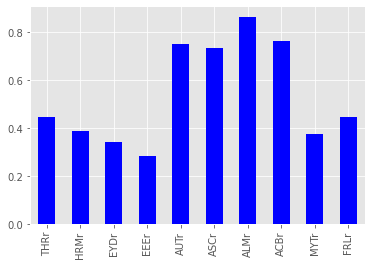

In [ ]:
df2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(color='blue',kind='bar')
plt.show()

In [ ]:
# Yearly returns for individual companies
ind_er = df2.resample('Y').last().pct_change().mean()
ind_er

THRr    0.395301
HRMr    0.399982
EYDr    0.098852
EEEr    0.098200
AUTr   -0.038210
ASCr    0.538579
ALMr    0.983440
ACBr   -0.033913
MYTr    0.290403
FRLr    0.123777
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

THRr    0.444999
HRMr    0.387038
EYDr    0.342136
EEEr    0.283150
AUTr    0.748514
ASCr    0.734342
ALMr    0.864290
ACBr    0.764231
MYTr    0.373363
FRLr    0.446453
dtype: float64

# Creating a table for visualising returns and volatility of assets

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
THRr,0.395301,0.444999
HRMr,0.399982,0.387038
EYDr,0.098852,0.342136
EEEr,0.098200,0.283150
AUTr,-0.038210,0.748514
ASCr,0.538579,0.734342
ALMr,0.983440,0.864290
ACBr,-0.033913,0.764231
MYTr,0.290403,0.373363
FRLr,0.123777,0.446453


#Random weights of portfolio

In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df2.columns)
num_portfolios = 10000

In [ ]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df2.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

#Create 10000 portfolios combinations

In [ ]:
portfolios  = pd.DataFrame(data) # Dataframe of the 10000 portfolios created
portfolios.head()

,Returns,Volatility,THRr weight,HRMr weight,EYDr weight,EEEr weight,AUTr weight,ASCr weight,ALMr weight,ACBr weight,MYTr weight,FRLr weight
0,0.352986,0.292577,0.227075,0.021153,0.034185,0.067250,0.030154,0.035710,0.188535,0.198494,0.141509,0.055936
1,0.257988,0.263128,0.097271,0.001722,0.101067,0.214844,0.021326,0.083120,0.111969,0.206749,0.123993,0.037939
2,0.337750,0.211727,0.191604,0.169598,0.051502,0.001171,0.114976,0.098450,0.076387,0.003229,0.174327,0.118756
3,0.282607,0.234334,0.166491,0.188950,0.115011,0.169469,0.041679,0.146239,0.029020,0.089535,0.023395,0.030210
4,0.366572,0.265126,0.144067,0.127352,0.044298,0.032365,0.137003,0.220002,0.116740,0.034490,0.038713,0.104972


#Plot the Efficient Frontier

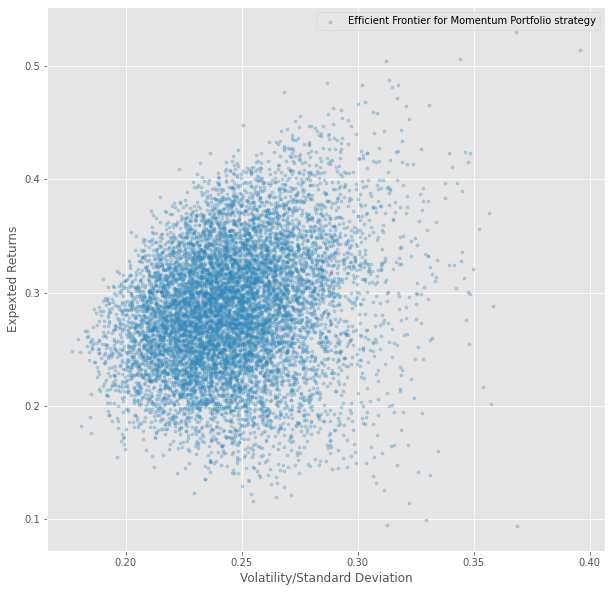

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10], label= 'Efficient Frontier for Momentum Portfolio strategy')
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Expexted Returns')
plt.show()
plt.savefig("Efficient Frontier Momentum Strategy blue.jpeg")

files.download("Efficient Frontier Momentum Strategy blue.jpeg") 

#Calculating and Plotting minimum - maximum and optimal portfolio for certain rf

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.248521
Volatility     0.176962
THRr weight    0.136211
HRMr weight    0.063065
EYDr weight    0.179640
EEEr weight    0.168648
AUTr weight    0.041740
ASCr weight    0.058105
ALMr weight    0.048685
ACBr weight    0.001295
MYTr weight    0.120881
FRLr weight    0.181729
Name: 3827, dtype: float64

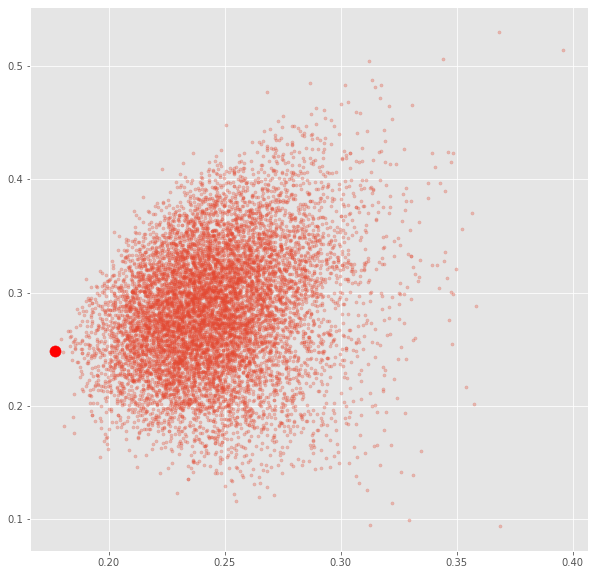

In [ ]:
#The minimum volatility is in a portfolio where the weights of (SRS, OLY, MRF,....)are (20%, 3%, 3%,.....)respectively. 
#This point can be plotted on the efficient frontier graph as shown:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='.', s=500)


In [ ]:
#Putting the maximun portfolio
max_vol_port = portfolios.iloc[portfolios['Volatility'].idxmax()]
# idxmax() gives us the maximum value in the column specified.                               
max_vol_port

Returns        0.514072
Volatility     0.395773
THRr weight    0.173356
HRMr weight    0.020034
EYDr weight    0.048479
EEEr weight    0.009163
AUTr weight    0.137997
ASCr weight    0.060470
ALMr weight    0.399208
ACBr weight    0.057130
MYTr weight    0.013378
FRLr weight    0.080784
Name: 2264, dtype: float64

In [ ]:
# Finding the optimal portfolio
rf = 7.7 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.514072
Volatility     0.395773
THRr weight    0.173356
HRMr weight    0.020034
EYDr weight    0.048479
EEEr weight    0.009163
AUTr weight    0.137997
ASCr weight    0.060470
ALMr weight    0.399208
ACBr weight    0.057130
MYTr weight    0.013378
FRLr weight    0.080784
Name: 2264, dtype: float64

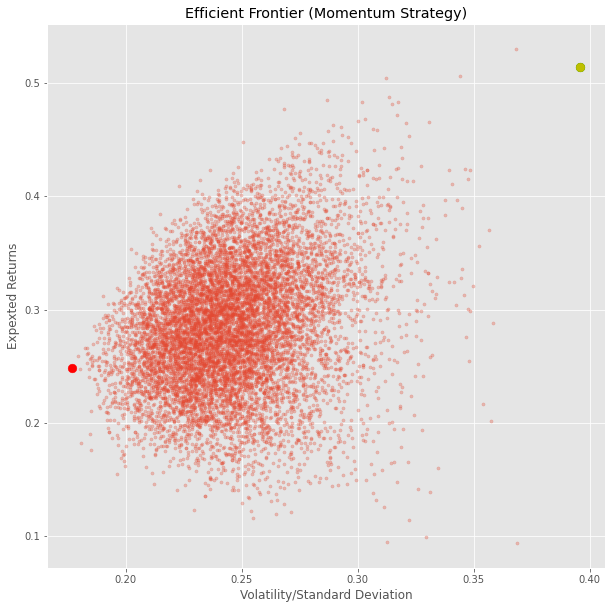

In [ ]:
# Plotting optimal portfolio
# The green star represents the optimal risky portfolio.#The red star the minimum and the yellow the maximum

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='.', s=300)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='.', s=300)
plt.scatter(max_vol_port[1], max_vol_port[0], color='y', marker='.', s=300)
plt.title(label= 'Efficient Frontier (Momentum Strategy)')
plt.xlabel('Volatility/Standard Deviation')
plt.ylabel('Expexted Returns')
plt.savefig('Efficient Frontier Momentum Strategy.png')

In [ ]:
min_vol_port.to_excel('minimum.xlsx')
max_vol_port.to_excel('maximum.xlsx')
optimal_risky_port.to_excel('optimal.xlsx')